In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
maximum = pd.read_csv('train.csv') # [40428967 rows x 24 columns]

/usr/local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# select only users with more than 50 appereances
n = maximum['device_ip'].value_counts()[maximum['device_ip'].value_counts()>=100].index
extracted = maximum.loc[maximum['device_ip'].isin(n)]
del maximum
extracted.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1000009418151094273,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
6,10000724729988544911,0,14102100,1005,0,8fda644b,25d4cfcd,f028772b,ecad2386,7801e8d9,...,1,0,20362,320,50,2333,0,39,-1,157
11,10001966791793526909,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15701,320,50,1722,0,35,-1,79
14,10002518649031436658,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,98fed791,d9b5648e,...,1,0,20984,320,50,2371,0,551,-1,46
16,10003585669470236873,0,14102100,1005,0,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,...,1,0,17914,320,50,2043,2,39,-1,32


In [4]:
extracted.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [5]:
extracted.shape

(15915817, 24)

In [19]:
extracted.shape

(15915817, 24)

In [6]:
extracted['click'].value_counts()

0    13220403
1     2695414
Name: click, dtype: int64

In [7]:
extracted.to_csv('filtered100.csv')

In [57]:
for i in range(14,22):
    s = 'C'+str(i)
    print(s + " " + str(len(extracted[s].unique())))

C14 2353
C15 8
C16 9
C17 417
C18 4
C19 68
C20 137
C21 59


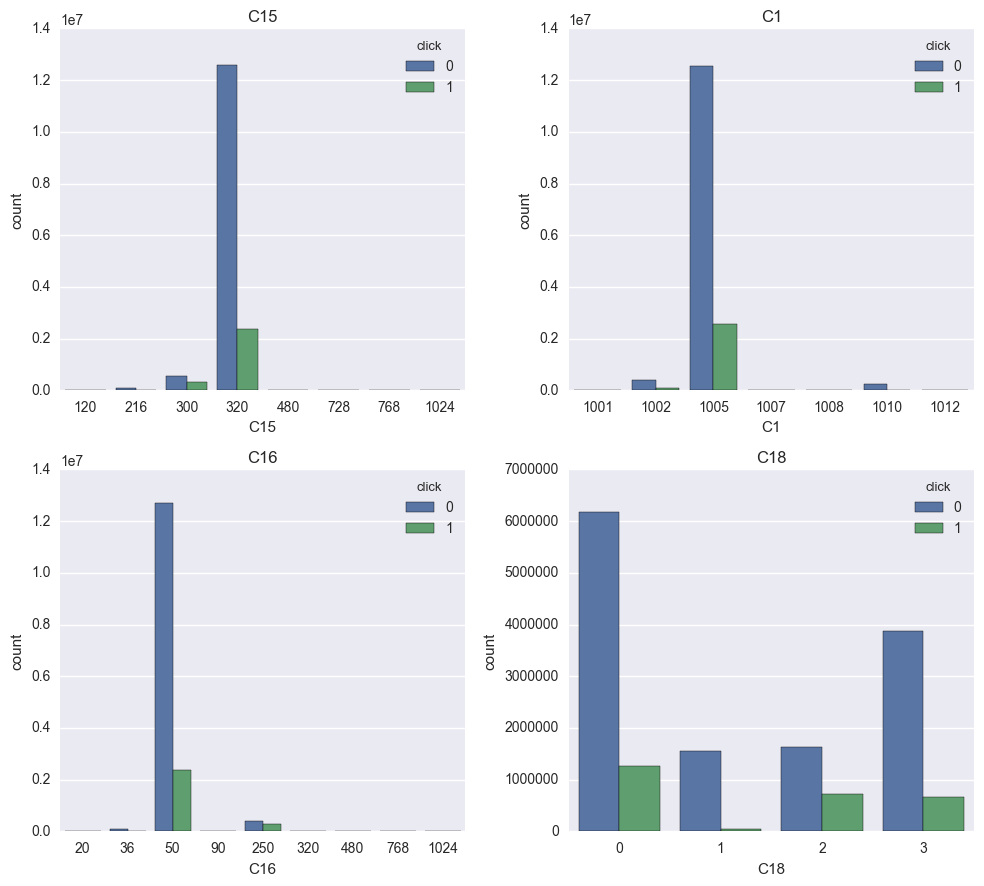

In [53]:
plt.figure(1)
f, axarr = plt.subplots(2, 2, figsize=(10, 9))
sns.countplot(x ='C15', hue = 'click',  data = extracted, ax=axarr[0,0])
axarr[0, 0].set_title('C15')
sns.countplot(x ='C1', hue = 'click',  data = extracted, ax=axarr[0, 1])
axarr[0, 1].set_title('C1')
sns.countplot(x ='C16', hue = 'click',  data = extracted, ax=axarr[1, 0])
axarr[1, 0].set_title('C16')
sns.countplot(x ='C18', hue = 'click',  data = extracted, ax=axarr[1, 1])
axarr[1, 1].set_title('C18')
plt.tight_layout()
plt.show()

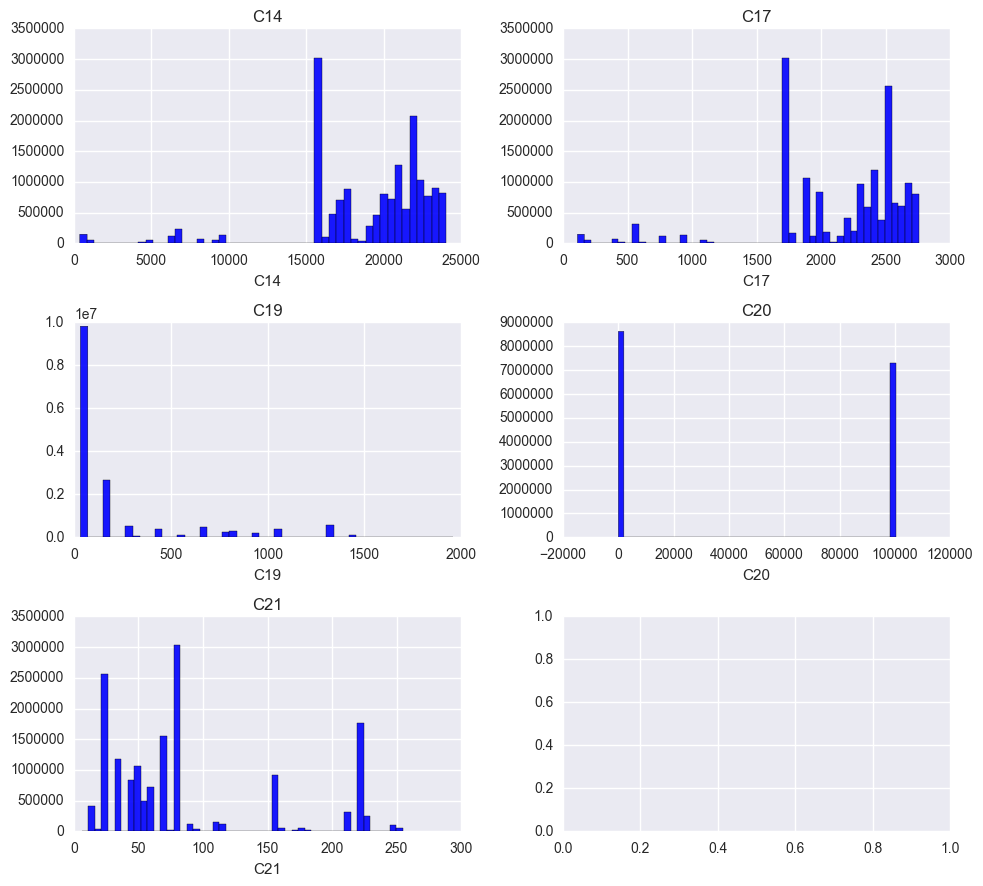

In [58]:
plt.figure(1)
f, axarr = plt.subplots(3, 2, figsize=(10, 9))
sns.distplot(extracted['C14'], kde = False, color = 'b', hist_kws={'alpha': 0.9}, ax=axarr[0,0])
axarr[0, 0].set_title('C14')
sns.distplot(extracted['C17'], kde = False, color = 'b', hist_kws={'alpha': 0.9}, ax=axarr[0,1])
axarr[0, 1].set_title('C17')
sns.distplot(extracted['C19'], kde = False, color = 'b', hist_kws={'alpha': 0.9}, ax=axarr[1,0])
axarr[1, 0].set_title('C19')
sns.distplot(extracted['C20'], kde = False, color = 'b', hist_kws={'alpha': 0.9}, ax=axarr[1,1])
axarr[1, 1].set_title('C20')
sns.distplot(extracted['C21'], kde = False, color = 'b', hist_kws={'alpha': 0.9}, ax=axarr[2,0])
axarr[2, 0].set_title('C21')
plt.tight_layout()
plt.show()

In [68]:
len(extracted['C14'].value_counts()[extracted['C14'].value_counts()>100000].index)

37

0    11921734
1     3983401
2        5785
7        2457
4        1940
3         419
5          81
Name: banner_pos, dtype: int64


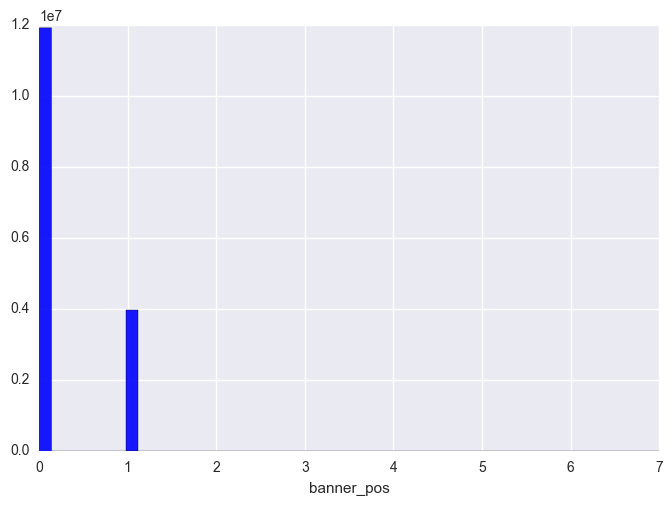

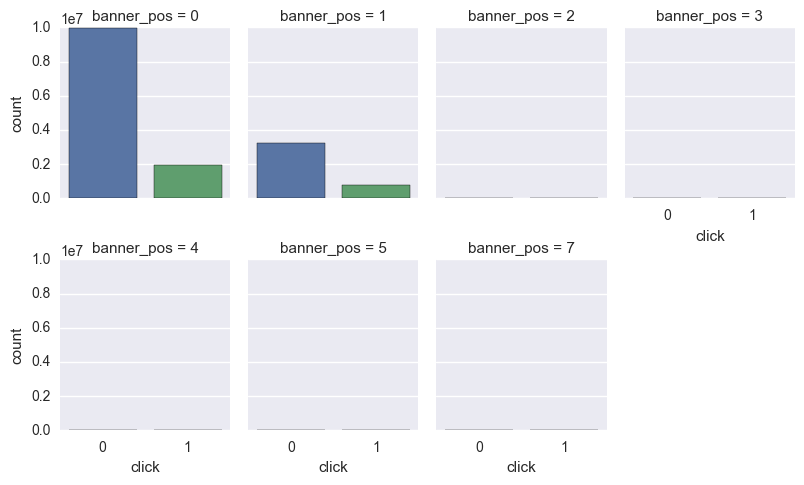

In [71]:
print(extracted['banner_pos'].value_counts())
g = sns.factorplot("click", col="banner_pos", col_wrap=4,
                    data=extracted,
                    kind="count", size=2.5, aspect=.8)

In [ ]:
sns.swarmplot(x="banner_pos", y="C1", hue="click", data=extracted)

In [ ]:
corr = extracted.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)

In [ ]:
categories = ['C1', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']

In [ ]:
filtered = extracted.groupby(['C1', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'])